In [1]:
%pip install opencv-python scikit-image scipy pillow matplotlib imageio

Note: you may need to restart the kernel to use updated packages.


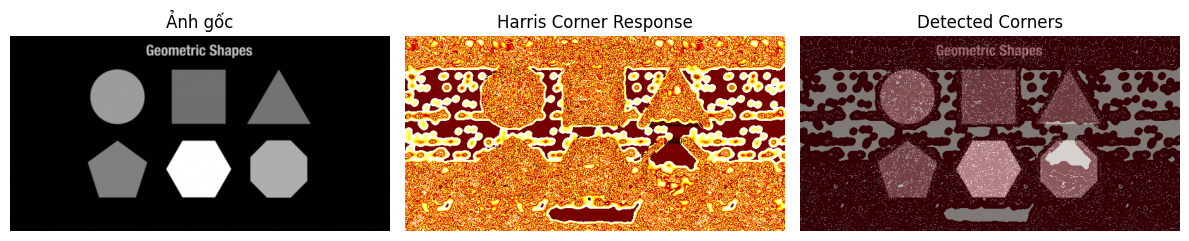

In [2]:
from PIL import Image
import numpy as np
import scipy.ndimage as nd
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang grayscale
img = Image.open('geometric.png').convert('L')
ndata = np.array(img)

def Harris_indata(alpha=0.2):
    # Tính gradient theo x và y
    x = nd.sobel(ndata, 0)
    y = nd.sobel(ndata, 1)
    
    # Tính các thành phần của ma trận Harris
    x1 = x * x
    y1 = y * y
    xy = x * y
    
    # Áp dụng Gaussian filter
    x1 = nd.gaussian_filter(x1, 3)
    y1 = nd.gaussian_filter(y1, 3)
    xy = nd.gaussian_filter(xy, 3)
    
    # Tính Harris response
    detC = x1 * y1 - xy * xy
    trC = x1 + y1
    R = detC - alpha * trC**2
    
    return R

# Tính Harris corner response
harris_response = Harris_indata()

# Hiển thị kết quả
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(ndata, cmap='gray')
plt.title('Ảnh gốc')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(harris_response, cmap='hot')
plt.title('Harris Corner Response')
plt.axis('off')

# Tìm corners với threshold
threshold = 0.01 * harris_response.max()
corners = harris_response > threshold

plt.subplot(1, 3, 3)
plt.imshow(ndata, cmap='gray')
plt.imshow(corners, alpha=0.5, cmap='Reds')
plt.title('Detected Corners')
plt.axis('off')

plt.tight_layout()
plt.show()